**Standardization**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Creating DataFrame norm_df from CSV NormDF
df = pd.read_csv('OutlierFix1', index_col=0)

# Displaying first five results 
df.head(2)

,C1,C2,C4,C7,C3',C5',C6',T4',T3',T5',S1',S2',S3'
0,2.08636,1.0,0.029074,1.710498,1,1.351792,1.306758,0.640426,0.979660,-1.241958,0.172661,-2.012621,-1.937792
1,2.41330,0.0,-0.013352,1.413903,0,2.487306,0.000000,0.644753,1.275142,-1.031589,0.180641,-1.696991,-1.706058


In [3]:
# checking for null values 
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
# Column Names 
norm_names = df.columns

# Scaler function from Preprocessing 
scaler = preprocessing.StandardScaler()

# Transforming norm_df
stand_df = scaler.fit_transform(df)

# Making DataFrame from Standardized data 
# Using column names defined earlier 
stand_df = pd.DataFrame(stand_df, columns=norm_names)

In [5]:
# Printing new DataFrame to check the outcome 
print(stand_df)

           C1        C2        C4        C7       C3'       C5'       C6'  \
0    0.061864  0.397360  0.669354 -0.338864  0.942972  0.073941  1.286365   
1    1.363203 -2.516611 -0.661906 -0.698536 -1.060477  2.663906 -0.769239   
2   -0.464011  0.397360  0.407053 -1.360611 -1.060477 -0.238850 -0.769239   
3    0.992418  0.397360  0.385343 -1.284447 -1.060477 -0.286349 -0.769239   
4   -0.667616  0.397360 -1.337894  0.983461  0.942972 -0.009048  1.111842   
5   -0.388840  0.397360 -2.048972  0.370875  0.942972  0.970198 -0.769239   
6    0.144855  0.397360 -0.114127 -1.550356 -1.060477 -0.176110 -0.769239   
7   -0.444910 -2.516611  1.031641  0.032016 -1.060477 -0.992180 -0.769239   
8   -0.281880  0.397360 -1.162840  0.553709 -1.060477  0.576359 -0.769239   
9   -0.181153  0.397360 -1.025062  0.853477  0.942972 -0.460893 -0.769239   
10  -0.164921  0.397360  0.043364  0.032016  0.942972 -0.023104 -0.769239   
11  -0.299253  0.397360  0.243010 -3.013224 -1.060477 -0.877182 -0.769239   

In [6]:
# Checking mean for standardized 
# Want to see mean very close to 0 
stand_df.mean()

C1    -1.513940e-16
C2    -6.788314e-17
C4     1.904635e-17
C7    -6.511572e-18
C3'    2.086959e-16
C5'    1.628707e-16
C6'   -4.232522e-18
T4'    2.840673e-16
T3'   -3.202473e-16
T5'    1.078683e-16
S1'   -3.304623e-16
S2'    6.816802e-19
S3'    2.098273e-15
dtype: float64

In [7]:
# Checking standard deviation of standardized data
# Want std dev of each column close to 1 
stand_df.std()

C1     1.000734
C2     1.000734
C4     1.000734
C7     1.000734
C3'    1.000734
C5'    1.000734
C6'    1.000734
T4'    1.000734
T3'    1.000734
T5'    1.000734
S1'    1.000734
S2'    1.000734
S3'    1.000734
dtype: float64

In [8]:
# Exporting DataFrame as CSV named StandDF
stand_df.to_csv('StandDF', ',')

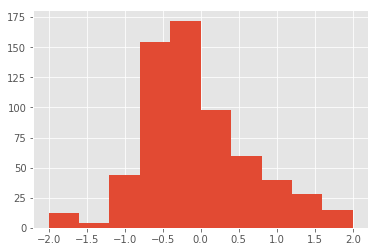

In [9]:
stand_df['C1'].hist(range=(-2,2))

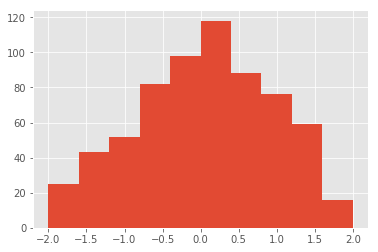

In [10]:
stand_df['C4'].hist(range=(-2,2))

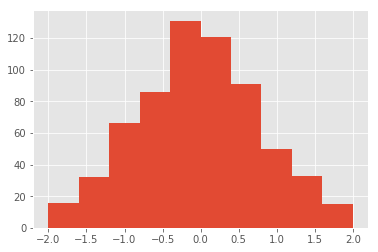

In [11]:
stand_df["C5'"].hist(range=(-2,2))

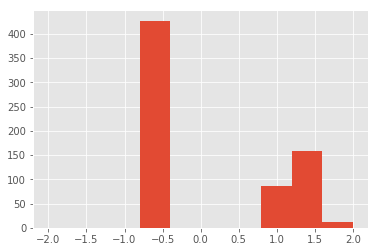

In [12]:
stand_df["C6'"].hist(range=(-2,2))

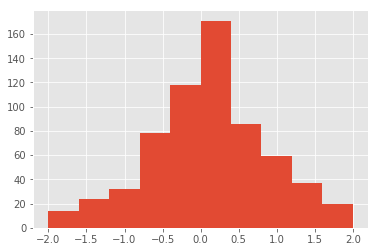

In [13]:
stand_df['C7'].hist(range=(-2,2))

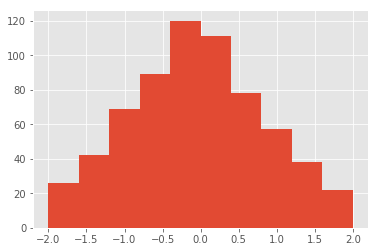

In [14]:
stand_df["T3'"].hist(range=(-2,2))

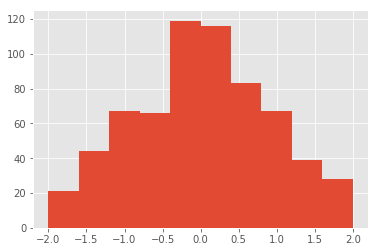

In [15]:
stand_df["T4'"].hist(range=(-2,2))

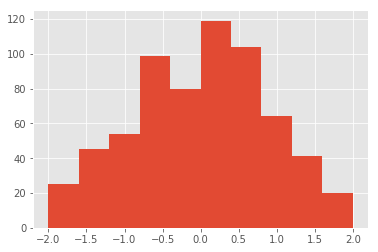

In [16]:
stand_df["T5'"].hist(range=(-2,2))

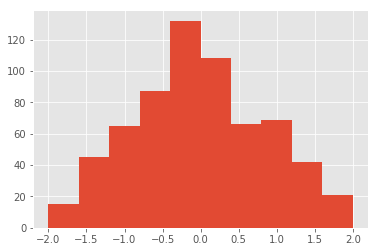

In [17]:
stand_df["S1'"].hist(range=(-2,2))

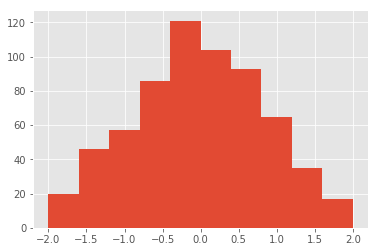

In [18]:
stand_df["S2'"].hist(range=(-2,2))

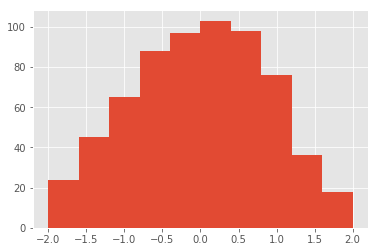

In [19]:
stand_df["S3'"].hist(range=(-2,2))

In [21]:
# Exporting DataFrame as CSV named CompDF1
df.to_csv('CompDF1', ',')